<a href="https://colab.research.google.com/github/Tongkat4/MY-ANALYSIS/blob/main/Techical_Analysis_(MA%2CIchimoku%2CRSI%2CStochastic%2CBolinger_Band%2C_MACD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplfinance
import mplfinance as mpf
import pandas_datareader.data as web
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as dates
import datetime
import numpy as np
%matplotlib inline
plt.style.use('seaborn-whitegrid')

     |████████████████████████████████| 71kB 3.9MB/s 


Code=0178.KL
     |████████████████████████████████| 71kB 3.8MB/s 


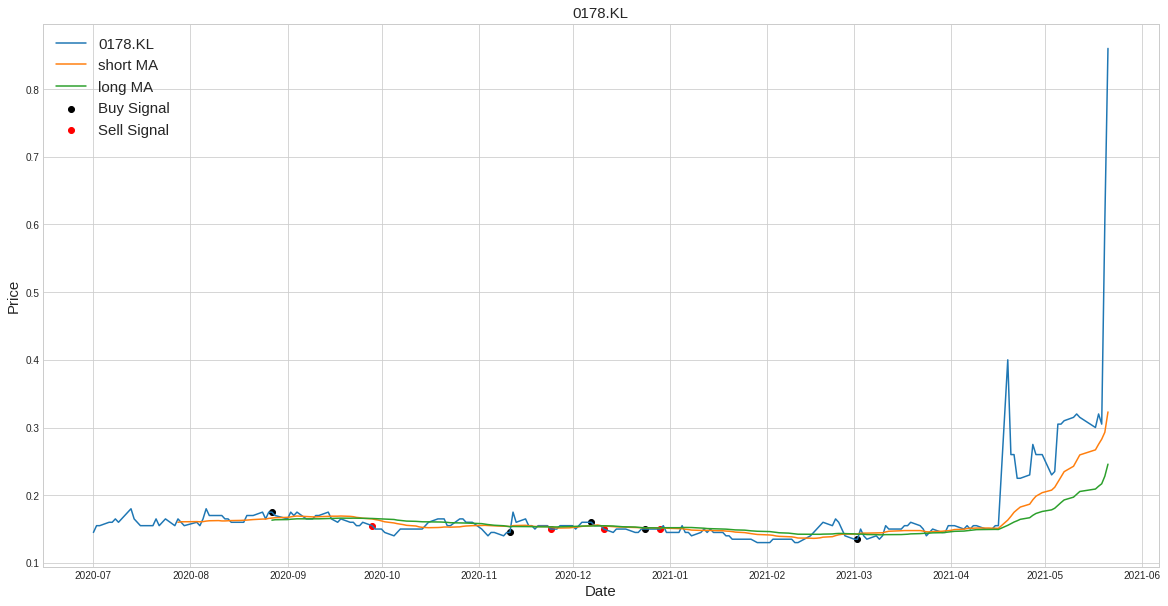

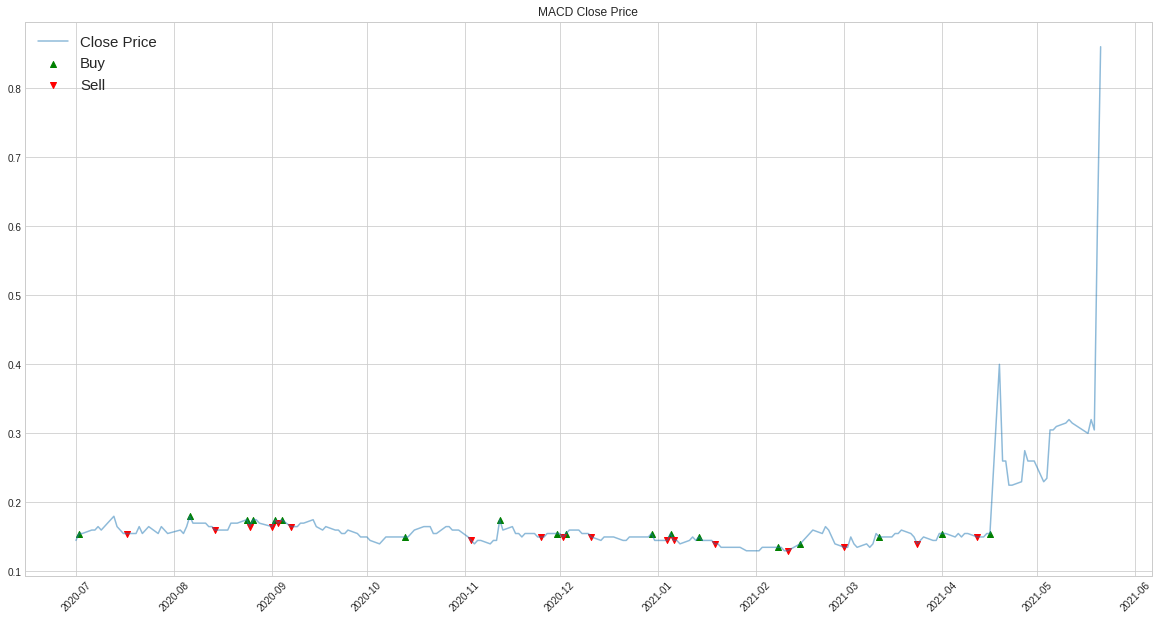

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:402: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:403: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



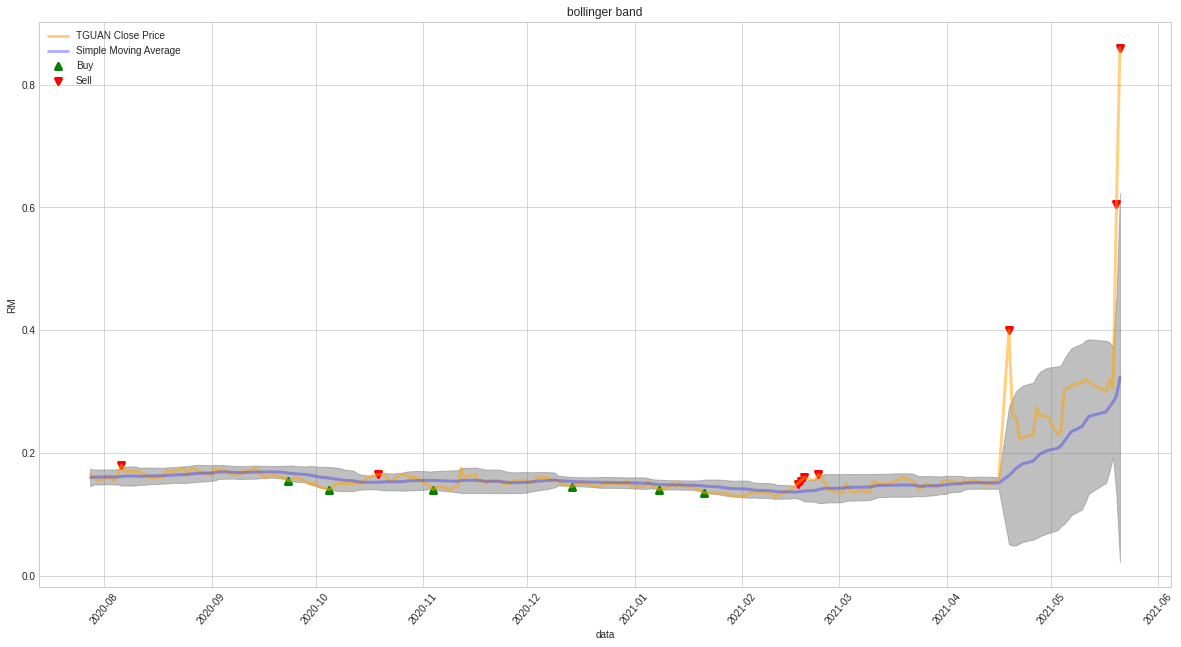

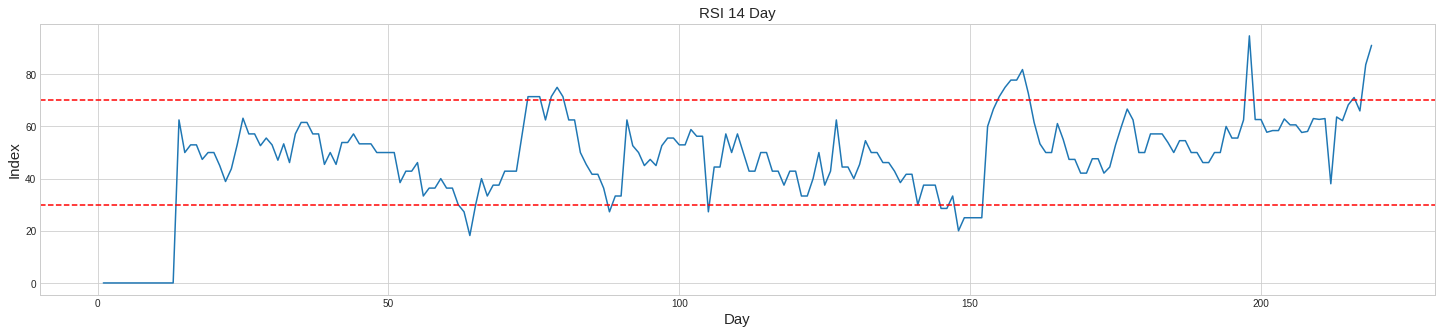

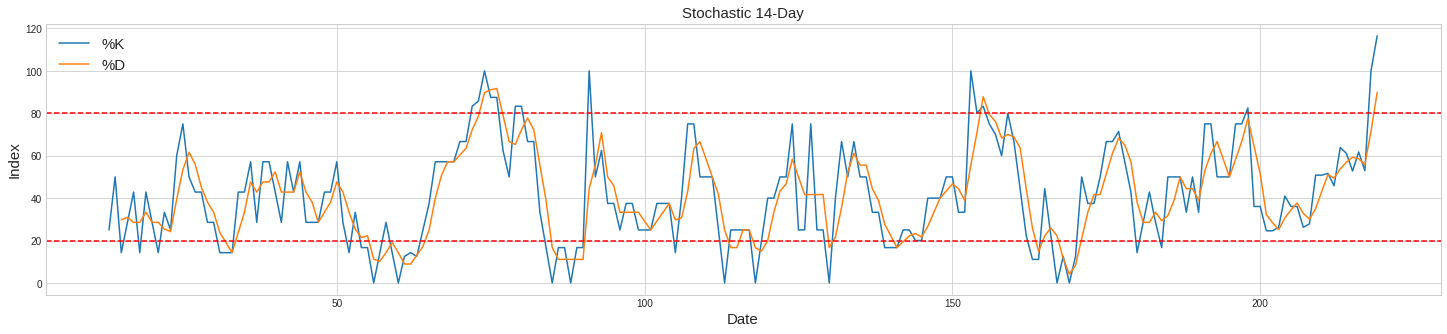

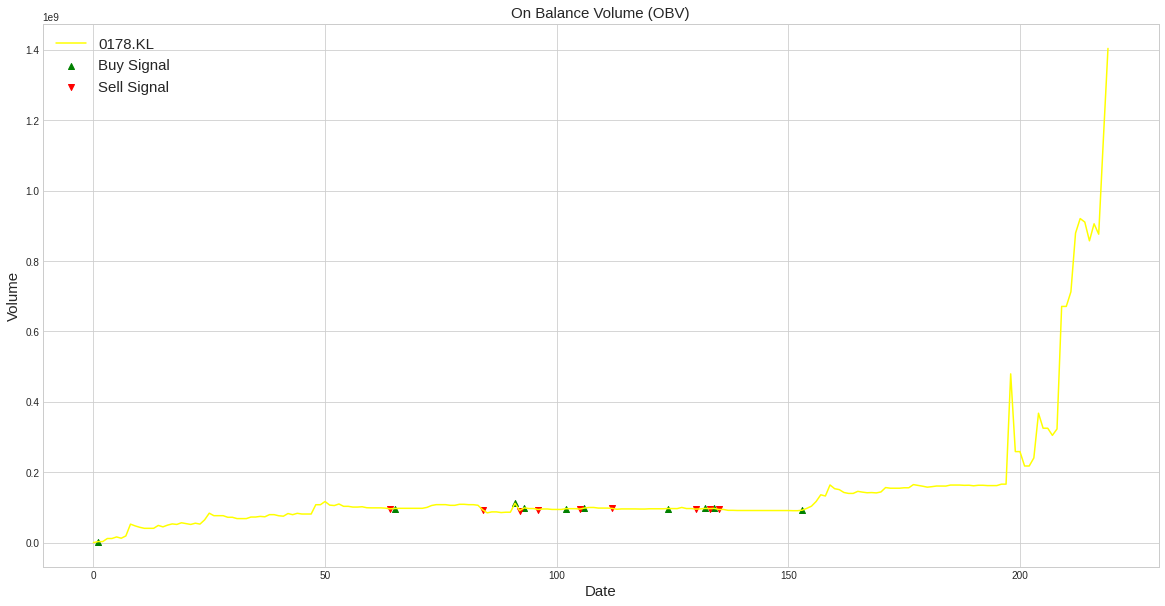

In [ ]:
start = datetime.datetime(2020,7,1)
end = datetime.datetime.now()
test = input('Code=')
stockTicker = test 
shortWindow = 20
longWindow = 40

d = web.DataReader(stockTicker,'yahoo',start,end)
d
d['Dates'] = dates.date2num(d.index)
shortMA = pd.DataFrame()
longMA = pd.DataFrame()
shortMA['Close'] = d['Close'].rolling(window=shortWindow).mean()
d['SMA'] = shortMA['Close']
longMA['Close'] = d['Close'].rolling(window=longWindow).mean()
d['LMA'] = longMA['Close']
d['14-high'] = d['High'].rolling(14).max()
d['14-low'] = d['Low'].rolling(14).min()
d['%K'] = (d['Close'] - d['14-low'])*100/(d['14-high'] - d['14-low'])
d['%D'] = d['%K'].rolling(3).mean()

x = (shortMA['Close'] > longMA['Close']).astype(int)
x
y = x.diff()

crossOverSignal = pd.DataFrame()
crossOverSignal[stockTicker] = d['Close']
crossOverSignal['buy'] = d['Close'][y>0]
crossOverSignal['sell'] = d['Close'][y<0]
d['BUY'] = crossOverSignal['buy'] 
d['SELL'] = crossOverSignal['sell']

shortEMA= d.Close.ewm(span=12, adjust=False).mean()
#calculate the long term exponential moving average (EMA)

longEMA= d.Close.ewm(span=26, adjust=False).mean()
#calculTE THE macd LINE

MACD = shortEMA - longEMA
#calculate the signal line 

signal= MACD.ewm(span=9, adjust=False).mean()

d['MACD'] = MACD
d['signal line'] = signal

period=20
#calculate the simple moving  average (SMA)
d['SMA']= d['Close'].rolling(window=period).mean()
#get the standard deviation
d['STD'] = d['Close'].rolling(window=period).std()
#calculate the upper b.b
d['Upper'] = d['SMA'] + (d['STD'] * 2)
#calculate the lower b.b
d['Lower']=d['SMA'] - (d['STD'] * 2)

new_df=d[period-1:]
new_df

####################################################################################################
# Ichimoku Cloud

# Tenkan-sen (Conversion Line): (9-period high + 9-period low)/2))

nine_period_high = d['High'].rolling(window= 9).max()
nine_period_low = d['Low'].rolling(window= 9).min()
d['tenkan_sen'] = (nine_period_high + nine_period_low) /2


# Kijun-sen (Base Line): (26-period high + 26-period low)/2))

period26_high = d['High'].rolling(window=26).max()
period26_low = d['Low'].rolling(window=26).min()
d['kijun_sen'] = (period26_high + period26_low) / 2


# Senkou Span A (Leading Span A): (Conversion Line + Base Line)/2))

d['senkou_span_a'] = ((d['tenkan_sen'] + d['kijun_sen']) / 2).shift(26)


# Senkou Span B (Leading Span B): (52-period high + 52-period low)/2))

period52_high = d['High'].rolling(window=52).max()
period52_low = d['Low'].rolling(window=52).min()
d['senkou_span_b'] = ((period52_high + period52_low) / 2).shift(26)

# The most current closing price plotted 26 time periods behind (optional)

d['chikou_span'] = d['Close'].shift(-26)

!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
trace = go.Candlestick(x=d.index,
                open=d['Open'],
                high=d['High'],
                low=d['Low'],
                close=d['Close'])
data = [trace]
iplot(data, filename='simple_candlestick')

# Set colours for up and down candles
INCREASING_COLOR = '#17BECF'
DECREASING_COLOR = '#7F7F7F'

# create list to hold dictionary with data for our first series to plot
# (which is the candlestick element itself)
data = [ dict(
    type = 'candlestick',
    open = d.Open,
    high = d.High,
    low = d.Low,
    close = d.Close,
    x = d.index,
    yaxis = 'y2',
    name = 'F',
    increasing = dict( line = dict( color = INCREASING_COLOR ) ),
    decreasing = dict( line = dict( color = DECREASING_COLOR ) ),
) ]

# Create empty dictionary for later use to hold settings and layout options
layout=dict()

# create our main chart "Figure" object which consists of data to plot and layout settings
fig = dict( data=data, layout=layout )

# Assign various seeting and choices - background colour, range selector etc
fig['layout']['plot_bgcolor'] = 'rgb(250, 250, 250)'
fig['layout']['xaxis'] = dict( rangeselector = dict( visible = True ) )
fig['layout']['yaxis'] = dict( domain = [0, 0.2], showticklabels = False )
fig['layout']['yaxis2'] = dict( domain = [0.2, 0.8] )
fig['layout']['legend'] = dict( orientation = 'h', y=0.9, x=0.3, yanchor='bottom' )
fig['layout']['margin'] = dict( t=40, b=40, r=40, l=40 )


# Populate the "rangeselector" object with necessary settings
rangeselector=dict(
    visible = True,
    x = 0, y = 0.9,
    bgcolor = 'rgba(150, 200, 250, 0.4)',
    font = dict( size = 13 ),
    buttons=list([
        dict(count=1,
             label='reset',
             step='all'),
        dict(count=1,
             label='1yr',
             step='year',
             stepmode='backward'),
        dict(count=3,
            label='3 mo',
            step='month',
            stepmode='backward'),
        dict(count=1,
            label='1 mo',
            step='month',
            stepmode='backward'),
        dict(step='all')
    ]))
    

fig['layout']['xaxis']['rangeselector'] = rangeselector

# Append the Ichimoku elements to the plot
fig['data'].append( dict( x=d['tenkan_sen'].index, y=d['tenkan_sen'], type='scatter', mode='lines', 
                         line = dict( width = 1 ),
                         marker = dict( color = '#33BDFF' ),
                         yaxis = 'y2', name='tenkan_sen' ) )

fig['data'].append( dict( x=d['kijun_sen'].index, y=d['kijun_sen'], type='scatter', mode='lines', 
                         line = dict( width = 1 ),
                         marker = dict( color = '#F1F316' ),
                         yaxis = 'y2', name='kijun_sen' ) )

fig['data'].append( dict( x=d['senkou_span_a'].index, y=d['senkou_span_a'], type='scatter', mode='lines', 
                         line = dict( width = 1 ), 
                         marker = dict( color = '#228B22' ),
                         yaxis = 'y2', name='senkou_span_a' ) )

fig['data'].append( dict( x=d['senkou_span_b'].index, y=d['senkou_span_b'], type='scatter', mode='lines', 
                         line = dict( width = 1 ),fill='tonexty',
                         marker = dict( color = '#FF3342' ),
                         yaxis = 'y2', name='senkou_span_b' ) )

fig['data'].append( dict( x=d['chikou_span'].index, y=d['chikou_span'], type='scatter', mode='lines', 
                         line = dict( width = 1 ),
                         marker = dict( color = '#D105F5' ),
                         yaxis = 'y2', name='chikou_span' ) )


# Set colour list for candlesticks
colors = []

for i in range(len(d.Close)):
    if i != 0:
        if d.Close[i] > d.Close[i-1]:
            colors.append(INCREASING_COLOR)
        else:
            colors.append(DECREASING_COLOR)
    else:
        colors.append(DECREASING_COLOR)
        
iplot( fig, filename = 'candlestick-ichimoku' )




####################################################################################################
# MA1


import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot

# Set colours for up and down candles
INCREASING_COLOR = 'green'
DECREASING_COLOR = 'red'

# create list to hold dictionary with data for our first series to plot
# (which is the candlestick element itself)
data = [ dict(
    type = 'candlestick',
    open = d.Open,
    high = d.High,
    low = d.Low,
    close = d.Close,
    x = d.index,
    yaxis = 'y2',
    name = test,
    increasing = dict( line = dict( color = INCREASING_COLOR ) ),
    decreasing = dict( line = dict( color = DECREASING_COLOR ) ),
) ]

# Create empty dictionary for later use to hold settings and layout options
layout=dict()

# create our main chart "Figure" object which consists of data to plot and layout settings
fig = dict( data=data, layout=layout )

# Assign various seeting and choices - background colour, range selector etc
fig['layout']['plot_bgcolor'] = 'rgb(250, 250, 250)'
fig['layout']['xaxis'] = dict( rangeselector = dict( visible = True ) )
fig['layout']['yaxis'] = dict( domain = [0, 0.2], showticklabels = False )
fig['layout']['yaxis2'] = dict( domain = [0.2, 0.8] )
fig['layout']['legend'] = dict( orientation = 'h', y=0.9, x=0.3, yanchor='bottom' )
fig['layout']['margin'] = dict( t=40, b=40, r=40, l=40 )


# Populate the "rangeselector" object with necessary settings
rangeselector=dict(
    visible = True,
    x = 0, y = 0.9,
    bgcolor = 'rgba(150, 200, 250, 0.4)',
    font = dict( size = 13 ),
    buttons=list([
        dict(count=1,
             label='Reset',
             step='all'),
        dict(count=1,
             label='1 Year',
             step='year',
             stepmode='backward'),
        dict(count=3,
            label='3 Month',
            step='month',
            stepmode='backward'),
        dict(count=1,
            label='1 Month',
            step='month',
            stepmode='backward'),
        dict(step='all')
    ]))
    

fig['layout']['xaxis']['rangeselector'] = rangeselector

# Append the Ichimoku elements to the plot
fig['data'].append( dict( x=d['SMA'].index, y=d['SMA'], type='scatter', mode='lines', 
                         line = dict( width = 1 ),
                         marker = dict( color = '#33BDFF' ),
                         yaxis = 'y2', name='Short Moving Average' ) )
                  
fig['data'].append( dict( x=d['LMA'].index, y=d['LMA'], type='scatter', mode='lines', 
                         line = dict( width = 1 ),
                         marker = dict( color = '#F1F316' ),
                         yaxis = 'y2', name='Long Moving Average' ) )

fig['data'].append( dict( x=d['BUY'].index, y=d['BUY'], type='scatter', mode='markers',
                         line = dict( width = 1 ),
                         marker = dict( color = 'blue' ),
                         yaxis = 'y2', name='Buy' ) )

fig['data'].append( dict( x=d['SELL'].index, y=d['SELL'], type='scatter', mode='markers', 
                         line = dict( width = 1 ),
                         marker = dict( color = 'black' ),
                         yaxis = 'y2', name='Sell' ) )



# Set colour list for candlesticks
colors = []

for i in range(len(d.Close)):
    if i != 0:
        if d.Close[i] > d.Close[i-1]:
            colors.append(INCREASING_COLOR)
        else:
            colors.append(DECREASING_COLOR)
    else:
        colors.append(DECREASING_COLOR)
        
iplot( fig, filename = 'Moving Average' )

####################################################################################################
# MA2

plt.figure(figsize=(20,10))
plt.plot(d['Close'],label = stockTicker)
plt.plot(shortMA['Close'],label ='short MA')
plt.plot(longMA['Close'],label ='long MA')
plt.scatter(crossOverSignal['buy'].index, crossOverSignal['buy'], color ='black', label='Buy Signal')
plt.scatter(crossOverSignal['sell'].index, crossOverSignal['sell'],color ='r', label='Sell Signal')
plt.title(test,size=15)
plt.xlabel('Date', size=15)
plt.ylabel('Price',size=15)
plt.legend( fontsize =15)
plt.show()


####################################################################################################
# MACD

#create signal buy and sell

def buy_sell(signal):
  buy= []
  sell= []
  flag= -1
  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['signal line'][i]:
      sell.append(np.nan)
      if flag != 1:
        buy.append(signal['Close'][i])
        flag = 1
      else:
        buy.append(np.nan)
    elif signal['MACD'][i] < signal['signal line'][i]:
      buy.append(np.nan)
      if flag != 0:
        sell.append(signal['Close'][i])
        flag = 0
      else:
        sell.append(np.nan)
    else:
      buy.append(np.nan)
      sell.append(np.nan)
  return (buy,sell)

a = buy_sell(d)
d['buy_signal_price'] = a[0]
d['sell_signal_price'] = a[1]

# visually show the stock buy or sell
plt.figure(figsize=(20.2,10.2))
plt.scatter(d.index, d['buy_signal_price'], color='green', label='Buy', marker='^')
plt.scatter(d.index, d['sell_signal_price'], color='red', label='Sell', marker='v')
plt.plot(d['Close'], label ='Close Price', alpha=0.5)
plt.xticks(rotation=45)
plt.title('MACD Close Price')
plt.legend(loc = 'upper left', fontsize=15)
plt.show()

####################################################################################################
# Bollinger Band

new_df=d[period-1:]
new_df

def get_signal(data):

  buy_signal = []
  sell_signal = []

  for i in range(len(data['Close'])):
   if data['Close'][i] > data['Upper'][i]: # then you should sell
     buy_signal.append(np.nan)
     sell_signal.append(data['Close'][i])
   elif data['Close'][i] < data['Lower'][i]: # then you should buy
     buy_signal.append(data['Close'][i])
     sell_signal.append(np.nan)
   else: 
     buy_signal.append(np.nan)
     sell_signal.append(np.nan)


  return (buy_signal, sell_signal)  

new_df['Buy'] = get_signal(new_df)[0]
new_df['Sell'] = get_signal(new_df)[1]

plt.style.use('seaborn-whitegrid')
#get the figure and the figure size
fig = plt.figure(figsize=(20.3,10.4))
#add the subplot
ax= fig.add_subplot(1,1,1)
#get the index values of the data frame
x_axis = new_df.index
#plot and shade the area between the upper and the lower band grey
ax.fill_between(x_axis, new_df['Upper'],new_df['Lower'], color = 'grey',alpha=0.5)
#plot the closing price and the moving average
ax.plot(x_axis, new_df['Close'], color = 'orange', lw = 3, label ='TGUAN Close Price',alpha=0.5)
ax.plot(x_axis, new_df['SMA'], color = 'blue', lw = 3, label ='Simple Moving Average',alpha=0.3)
ax.scatter(x_axis, new_df['Buy'], color = 'green', lw=3, label='Buy', marker='^',alpha=1)
ax.scatter(x_axis, new_df['Sell'], color = 'red', lw=3, label='Sell', marker='v',alpha=1)
#set the title and show the image
ax.set_title('bollinger band')
ax.set_xlabel('data')
ax.set_ylabel('RM')
plt.xticks(rotation = 50)
ax.legend()
plt.show()

####################################################################################################
# RSI

def relative_strength_idx(stock, n=14):
    close = d['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

d['RSI'] = relative_strength_idx(d).fillna(0)

d = d.reset_index()

plt.figure(figsize=(25,5))
plt.plot(d['RSI'],label = stockTicker)
plt.axhline(y=70,linestyle='--', color='r')
plt.axhline(y=30,linestyle='--', color='r')
plt.title('RSI 14 Day',size=15)
plt.xlabel('Day', size=15)
plt.ylabel('Index',size=15)


####################################################################################################
#STOCHASTIC

plt.figure(figsize=(25,5))
plt.plot(d['%K'],label ='%K')
plt.plot(d['%D'],label ='%D')
#plt.plot(stock['%D'],label ='%D')
plt.title('Stochastic 14-Day',size=15)
plt.xlabel('Date', size=15)
plt.ylabel('Index',size=15)
plt.legend( fontsize =15)
plt.axhline(y=80,linestyle='--', color='r')
plt.axhline(y=20,linestyle='--', color='r')
plt.show()

####################################################################################################
#OBV

OBV =[]

OBV.append(0)

for i in range(1, len(d.Close)):
    if d.Close[i] > d.Close[i-1]:
        OBV.append(OBV[-1]+d.Volume[i])
    elif d.Close[i] < d.Close[i-1]:
        OBV.append(OBV[-1]-d.Volume[i])
    else:
        OBV.append(OBV[-1])
        
        
d['OBV'] = OBV
d['OBV EMA'] = d['OBV'].ewm(span=20).mean()
x = (d['OBV'] > d['OBV EMA']).astype(int)
x
y = x.diff()

crossOverSignal = pd.DataFrame()
crossOverSignal[stockTicker] = d['OBV']
crossOverSignal['buy'] = d['OBV'][y>0]
crossOverSignal['sell'] = d['OBV'][y<0]

plt.figure(figsize=(20,10))
plt.plot(d['OBV'],label = stockTicker , color ='yellow',alpha=1)
plt.scatter(crossOverSignal['buy'].index, crossOverSignal['buy'], marker ='^', color ='green', label='Buy Signal')
plt.scatter(crossOverSignal['sell'].index, crossOverSignal['sell'], marker ='v',color ='r', label='Sell Signal')
plt.title('On Balance Volume (OBV)',size=15)
plt.xlabel('Date', size=15)
plt.ylabel('Volume',size=15)
plt.legend( fontsize =15)
plt.show()



In [ ]:
d

,Date,High,Low,Open,Close,Volume,Adj Close,Dates,SMA,LMA,...,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span,buy_signal_price,sell_signal_price,RSI,OBV,OBV EMA
0,2020-01-02,4.18,4.13,4.14,4.15,4128600.0,4.060905,18263.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.30,NaN,NaN,NaN,0.0,0.000000e+00
1,2020-01-03,4.20,4.16,4.17,4.20,9316900.0,4.109831,18264.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.37,4.2,NaN,0.000000,9316900.0,4.891372e+06
2,2020-01-06,4.20,4.13,4.20,4.16,1333400.0,4.070690,18267.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.36,NaN,NaN,0.000000,7983500.0,6.026783e+06
3,2020-01-07,4.39,4.15,4.16,4.36,2999100.0,4.266397,18268.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.38,NaN,NaN,0.000000,10982600.0,7.457451e+06
4,2020-01-08,4.28,4.16,4.27,4.21,3508800.0,4.119617,18269.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.40,NaN,NaN,0.000000,7473800.0,7.461406e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,2021-05-11,3.68,3.62,3.65,3.66,1281900.0,3.660000,18758.0,3.7940,3.78375,...,3.770,3.925,3.6725,3.56,NaN,NaN,NaN,30.232550,11313900.0,1.133442e+07
335,2021-05-12,3.72,3.62,3.67,3.71,1093900.0,3.710000,18759.0,3.7860,3.78250,...,3.745,3.925,3.6725,3.56,NaN,NaN,NaN,43.055556,12407800.0,1.143664e+07
336,2021-05-17,3.78,3.65,3.69,3.67,3918000.0,3.670000,18764.0,3.7760,3.77800,...,3.735,3.925,3.6750,3.56,NaN,NaN,NaN,42.465753,8489800.0,1.115599e+07
337,2021-05-18,3.75,3.66,3.66,3.72,2434700.0,3.720000,18765.0,3.7695,3.77600,...,3.715,3.925,3.6800,3.56,NaN,NaN,NaN,43.243243,10924500.0,1.113394e+07
